In [5]:
# import important libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
print("Data Visualization and Exploration...")

Data Visualization and Exploration...


In [6]:
# loading dataset from train.csv file 
dataset = pd.read_csv('./train.csv')


In [7]:
#print the first two rows of dataset
print(dataset.head(2))

   trip_duration  distance_traveled  num_of_passengers   fare  tip   
0          748.0               2.75                1.0   75.0   24  \
1         1187.0               3.43                1.0  105.0   24   

   miscellaneous_fees  total_fare  surge_applied  
0                 6.3       105.3              0  
1                13.2       142.2              0  


In [8]:
#check information of dataset columns
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB
None


In [9]:
#check features of dataset
print(dataset.describe())

       trip_duration  distance_traveled  num_of_passengers           fare   
count  209673.000000      209673.000000      209673.000000  209673.000000  \
mean     1173.181478           5.054431           1.292808      99.623431   
std      4775.653621         125.217419           0.930754      85.602702   
min         0.000000           0.020000           0.000000       0.000000   
25%       446.000000           1.950000           1.000000      52.500000   
50%       707.000000           3.200000           1.000000      75.000000   
75%      1098.000000           5.730000           1.000000     116.250000   
max     86387.000000       57283.910000           9.000000    4466.250000   

                 tip  miscellaneous_fees     total_fare  surge_applied  
count  209673.000000       209673.000000  209673.000000  209673.000000  
mean       13.030824           15.136829     127.791084       0.280523  
std        20.367764           12.553436      98.797374       0.449256  
min         0.

In [36]:
print("DataPre-processing and cleaning")

DataPre-processing and cleaning


In [10]:
#Check if any value present in dataset is null or not

def checkIfNullPresent(dataset):
    for val in dataset.isna().sum():
        if val!=0:
            return "Null value is present in dataset!"
    return "No null value present in dataset!"


print(checkIfNullPresent(dataset))

No null value present in dataset!


In [11]:
# Since there is no missing value present we'll keep our dataset as it is
# if it would be there then we could have used 
# following steps
# drop column with missing values or imputatiion or any other method

In [12]:
# Creating indepened variable X 
# and a depenedent variable y
X = dataset.iloc[:,dataset.columns!='total_fair']
y = dataset['total_fare']


In [ ]:
#normalisation of data by dividing 255 because the range of pixels are 0 to 256 so it will
# convert datas in the range of 0 to 1.
X /=255
y /=255

In [37]:
#check the shape of X and y
print(X.shape)
print(y.shape)

(209673, 8)
(209673,)


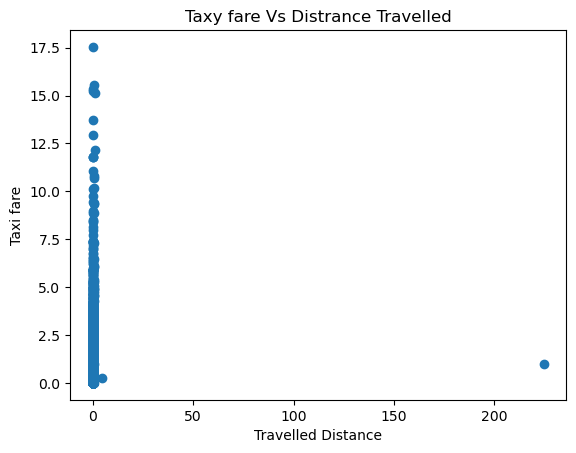

In [15]:
#Data visualisation using matplot lib
# Plotting a graph between taxy fare and distance travelled.
plt.scatter(
    X.distance_traveled,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None
)
plt.title("Taxy fare Vs Distrance Travelled")
plt.xlabel("Travelled Distance")
plt.ylabel("Taxi fare")
plt.show()

In [16]:
print("From above visualisation we can see that very few people have travelled more than 200 most of them have travelled between 0 to 50 only.")

From above visualisation we can see that very few people have travelled more than 200 most of them have travelled between 0 to 50 only.


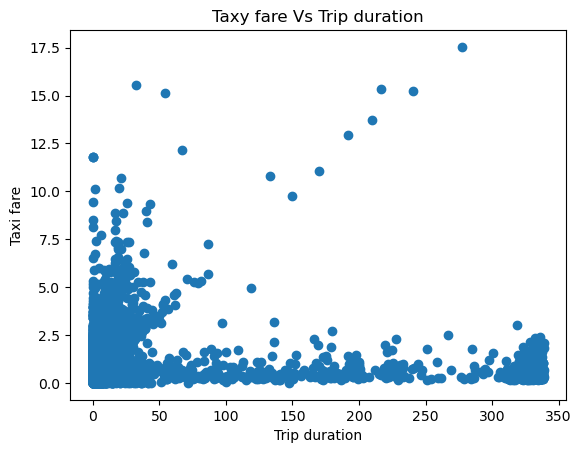

In [17]:
# Plotting a graph between taxy fare and trip duration.
plt.scatter(
    X.trip_duration,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None
)
plt.title("Taxy fare Vs Trip duration")
plt.xlabel("Trip duration")
plt.ylabel("Taxi fare")
plt.show()

In [18]:
print("From the above visualation it can be observed the no. of people is more at less time of duration and less taxy fare as well.")

From the above visualation it can be observed the no. of people is more at less time of duration and less taxy fare as well.


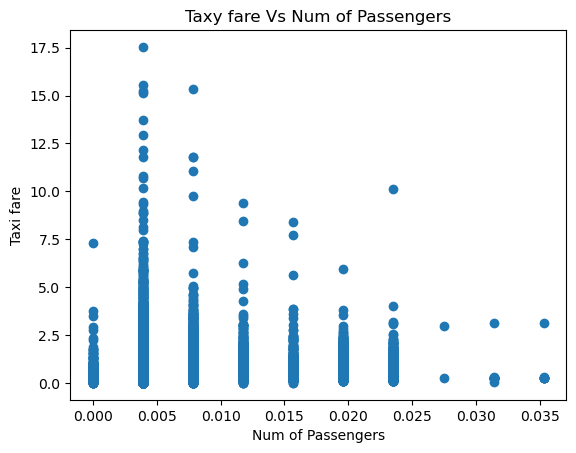

In [19]:
# Plotting a graph between taxy fare and num of passengers.
plt.scatter(
    X.num_of_passengers,
    y,
    s=None,
    c=None,
    marker=None,
    cmap=None,
    norm=None,
    vmin=None,
    vmax=None,
    alpha=None,
    linewidths=None
)
plt.title("Taxy fare Vs Num of Passengers")
plt.xlabel("Num of Passengers")
plt.ylabel("Taxi fare")
plt.show()

In [20]:
print("From above we can see if taxi fare is less the no. of people is more")

From above we can see if taxi fare is less the no. of people is more


In [38]:
print("Model Building")

Model Building


In [21]:
# import libararies for train-test-split and LinearRegression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [43]:
print("Build Model/s using 1) Linear Regression ")

Build Model/s using 1) Linear Regression 


In [22]:
# creating a function complile model which will take two arguments train and test
# and it will fit the model,compile it then will return an object of compliled and trained model
def compileTrainModel(X_train,y_train):
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    return model

#visualization of medel prediction
def model_visualisation(X,y,X_train,model):
    plt.scatter(X.num_of_passengers,y,color='blue')
    plt.scatter(X.distance_traveled,y,color='red')
    plt.scatter(X.trip_duration,y,color='green')


    plt.plot(X_train,model.predict(X_train),color='wheat')

In [39]:
# splitting data into traing,test, validation for Case 1
# where training size is 80% and test size is 20%.
# and random a state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



# splitting data into traing,test, validation for
# Case 2
# where training size is 10% and test size is 90%.
# and a random state = 42
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.90, random_state=42)

In [40]:
model_1 = compileTrainModel(X_train,y_train)
model_2 = compileTrainModel(X_train_2,y_train_2)

In [41]:
print("for case 1: 80% train and 20% test data")
print("MAE: ",mean_absolute_error(y_test,model_1.predict(X_test)))

for case 1: 80% train and 20% test data
MAE:  3.792252893676581e-15


In [42]:
print("for case 2: 10% train and 90% test data")
print("MAE: ",mean_absolute_error(y_test_2,model_2.predict(X_test_2)))

for case 2: 10% train and 90% test data
MAE:  1.6073612970985598e-15


In [44]:
print("Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and choose the best for your model. Justify your answer.")

Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and choose the best for your model. Justify your answer.


In [45]:
# from the above result we can see 
MAE_CASE_1 = mean_absolute_error(y_test,model_1.predict(X_test))
MAE_CASE_2 = mean_absolute_error(y_test_2,model_2.predict(X_test_2))

In [46]:
def displayAnswer():
    if MAE_CASE_1>MAE_CASE_2:
        print("model_2 for case - 2: 10 % of training data & 90% of test data is better as it has less error!")
    else:
        print("model_1 for case - 1: 80% of training data & 20% of test is is performing better as it has less error!")

In [47]:
displayAnswer()

model_2 for case -2: 10 % of training data & 90% of test data is better as it has less error!
